In [4]:
## importing the libraries for data manuplation and preprocessingabs'
import pandas as pd
import numpy as np
import os
import math 
from sklearn.preprocessing import OneHotEncoder

In [5]:
## import libraries for visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [6]:
## importing libraries for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

In [7]:
## import libraries for performance metrices
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [8]:
# checking the current working directory
os.getcwd()

'/Users/deepaksingla/Desktop'

In [9]:
## reading the training data
df1=pd.read_csv("/Users/deepaksingla/Desktop/company/jobathon/train_s3TEQDk.csv")

In [10]:
## reading the 30% test data
tdf1=pd.read_csv("/Users/deepaksingla/Desktop/company/jobathon/test_mSzZ8RL.csv")

In [11]:
## checking shape and head of training data
print(df1.shape)
df1.head()

(245725, 11)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [12]:
## checking shape and head of test data
print(tdf1.shape)
tdf1.head()

(105312, 10)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [13]:
## checking traget variable event rate
print(df1["Is_Lead"].value_counts())
df1["Is_Lead"].value_counts()/df1.shape[0]

0    187437
1     58288
Name: Is_Lead, dtype: int64


0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

In [14]:
## checking the null values in training data
df1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [15]:
## checking the null values in test data
tdf1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [16]:
## checking the dtypes of traing and testing
print(df1.dtypes)
print(tdf1.dtypes)

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object
ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object


In [17]:
## creating a list of var based on their types
catg_var=["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]
cont_var=["Age","Vintage","Avg_Account_Balance"]
cust_id=["ID"]
target_var=["Is_Lead"]
print(str(catg_var),len(catg_var))
print(str(cont_var),len(cont_var))
print(str(cust_id),len(cust_id))
print(str(target_var),len(target_var))

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'] 6
['Age', 'Vintage', 'Avg_Account_Balance'] 3
['ID'] 1
['Is_Lead'] 1


In [18]:
## checking the number of unique values for categorivcal var in training data
for i in (catg_var):
    print(i,df1[i].nunique())

Gender 2
Region_Code 35
Occupation 4
Channel_Code 4
Credit_Product 2
Is_Active 2


In [19]:
## checking the number of unique values for categorivcal var in test data
for i in (catg_var):
    print(i,tdf1[i].nunique())

Gender 2
Region_Code 35
Occupation 4
Channel_Code 4
Credit_Product 2
Is_Active 2


In [20]:
## checking the unique values for categorical var in training data
for i in (catg_var):
    print(i,df1[i].unique())

Gender ['Female' 'Male']
Region_Code ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code ['X3' 'X1' 'X2' 'X4']
Credit_Product ['No' nan 'Yes']
Is_Active ['No' 'Yes']


In [21]:
## checking the unique values value counts for categorical var in training data
for i in (catg_var):
    print(i,df1[i].value_counts())

Gender Male      134197
Female    111528
Name: Gender, dtype: int64
Region_Code RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64
Occupation Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
Channel_Code X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
Credit_Product No     144357
Yes     72043
Name: Credit_Product, dtype: int64
Is_Active No     150290
Yes     95435
Name: Is_Ac

In [22]:
## creating an copy of dataframe
df2=df1.copy()
tdf2=tdf1.copy()

## Null value treatment

In [23]:
## checking the null values in training data
df2.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [24]:
## checking the null values in training data
tdf2.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [25]:
## since thier in null vale in only credit product column, which is categorical we will take null as
## differnt category named as null_value

## doing for training
df2["Credit_Product"]=np.where(df2["Credit_Product"].isna(),"null_val",df2["Credit_Product"])

## doing for test
tdf2["Credit_Product"]=np.where(tdf2["Credit_Product"].isna(),"null_val",tdf2["Credit_Product"])

In [26]:
df2["Credit_Product"].value_counts()

No          144357
Yes          72043
null_val     29325
Name: Credit_Product, dtype: int64

In [27]:
print(df2.isnull().sum().sum())
print(tdf2.isnull().sum().sum())
## no null value left

0
0


In [28]:
## descritption of continuous variables
df2[cont_var].describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


## Exploratory Data Analysis (EDA)

### Numeric vs. Target EDA

In [29]:
cont_var

['Age', 'Vintage', 'Avg_Account_Balance']

### Age vs Target

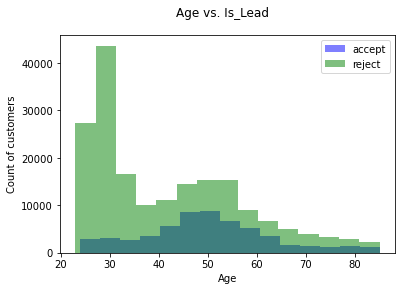

In [30]:
fig, ax = plt.subplots()

ax.hist(df2[df2["Is_Lead"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="accept")
ax.hist(df2[df2["Is_Lead"]==0]["Age"], bins=15, alpha=0.5, color="green", label="reject")

ax.set_xlabel("Age")
ax.set_ylabel("Count of customers")

fig.suptitle("Age vs. Is_Lead")

ax.legend();

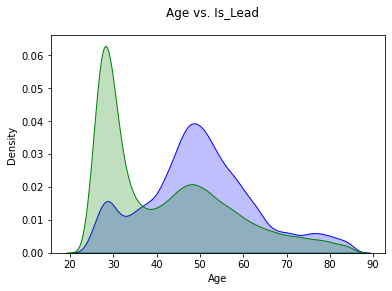

In [31]:
fig, ax = plt.subplots()

sns.kdeplot(df2[df2["Is_Lead"]==1]["Age"], shade=True, color="blue", label="accept", ax=ax)
sns.kdeplot(df2[df2["Is_Lead"]==0]["Age"], shade=True, color="green", label="reject", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Is_Lead");


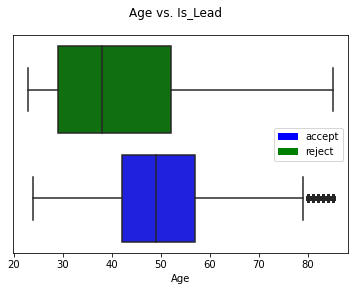

In [32]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Is_Lead", data=df2, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Is_Lead")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches);

### Vintage vs Target

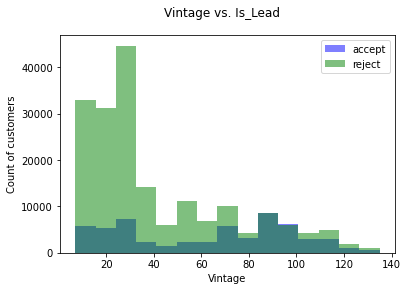

In [33]:
fig, ax = plt.subplots()

ax.hist(df2[df2["Is_Lead"]==1]["Vintage"], bins=15, alpha=0.5, color="blue", label="accept")
ax.hist(df2[df2["Is_Lead"]==0]["Vintage"], bins=15, alpha=0.5, color="green", label="reject")

ax.set_xlabel("Vintage")
ax.set_ylabel("Count of customers")

fig.suptitle("Vintage vs. Is_Lead")

ax.legend();

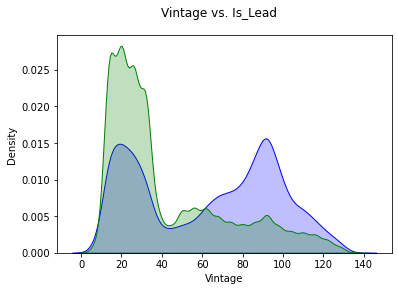

In [34]:
fig, ax = plt.subplots()

sns.kdeplot(df2[df2["Is_Lead"]==1]["Vintage"], shade=True, color="blue", label="accept", ax=ax)
sns.kdeplot(df2[df2["Is_Lead"]==0]["Vintage"], shade=True, color="green", label="reject", ax=ax)

ax.set_xlabel("Vintage")
ax.set_ylabel("Density")

fig.suptitle("Vintage vs. Is_Lead");


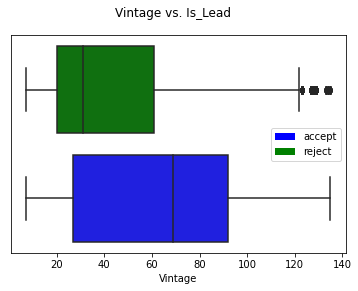

In [35]:
fig, ax = plt.subplots()

sns.boxplot(x="Vintage", y="Is_Lead", data=df2, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Vintage vs. Is_Lead")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches);

### Avg_Account_Balance vs Target

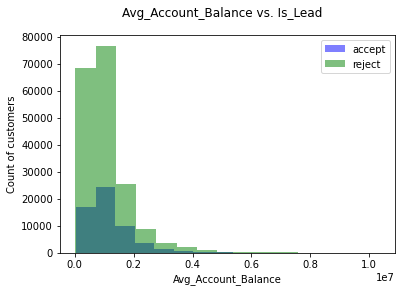

In [36]:
fig, ax = plt.subplots()

ax.hist(df2[df2["Is_Lead"]==1]["Avg_Account_Balance"], bins=15, alpha=0.5, color="blue", label="accept")
ax.hist(df2[df2["Is_Lead"]==0]["Avg_Account_Balance"], bins=15, alpha=0.5, color="green", label="reject")

ax.set_xlabel("Avg_Account_Balance")
ax.set_ylabel("Count of customers")

fig.suptitle("Avg_Account_Balance vs. Is_Lead")

ax.legend();

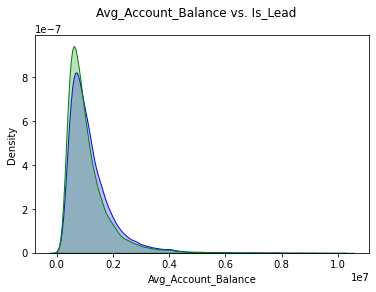

In [37]:
fig, ax = plt.subplots()

sns.kdeplot(df2[df2["Is_Lead"]==1]["Avg_Account_Balance"], shade=True, color="blue", label="accept", ax=ax)
sns.kdeplot(df2[df2["Is_Lead"]==0]["Avg_Account_Balance"], shade=True, color="green", label="reject", ax=ax)

ax.set_xlabel("Avg_Account_Balance")
ax.set_ylabel("Density")

fig.suptitle("Avg_Account_Balance vs. Is_Lead");


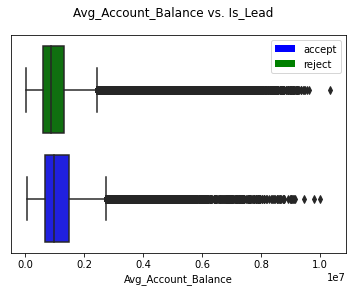

In [38]:
fig, ax = plt.subplots()

sns.boxplot(x="Avg_Account_Balance", y="Is_Lead", data=df2, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Avg_Account_Balance vs. Is_Lead")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches);

## Categorical Features vs. Target EDA

In [39]:
catg_var

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

### Gender

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


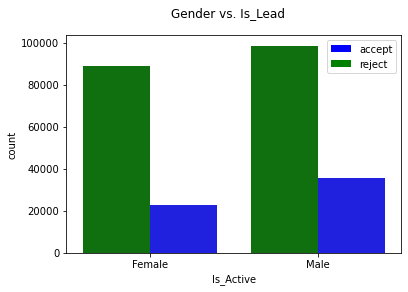

In [40]:
fig, ax = plt.subplots()
sns.countplot('Gender', hue="Is_Lead", data=df2, 
                palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need
ax.set_xlabel(i)

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches)
fig.suptitle("Gender vs. Is_Lead");

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


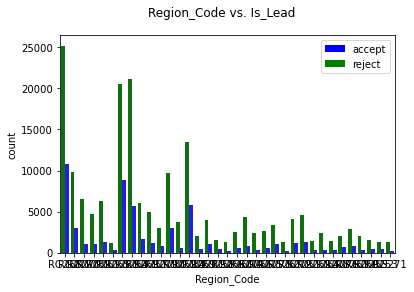

In [41]:
#Region_Code
fig, ax = plt.subplots()
sns.countplot('Region_Code', hue="Is_Lead", data=df2, 
                palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need
ax.set_xlabel("Region_Code")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches)
fig.suptitle("Region_Code vs. Is_Lead");

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


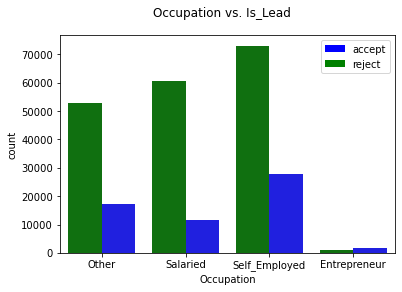

In [42]:
#Occupation
fig, ax = plt.subplots()
sns.countplot('Occupation', hue="Is_Lead", data=df2, 
                palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need
ax.set_xlabel("Occupation")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches)
fig.suptitle("Occupation vs. Is_Lead");

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


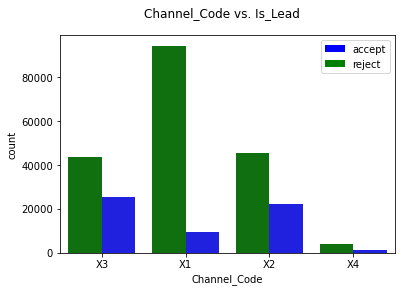

In [43]:
#Channel_Code
fig, ax = plt.subplots()
sns.countplot('Channel_Code', hue="Is_Lead", data=df2, 
                palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need
ax.set_xlabel("Channel_Code")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches)
fig.suptitle("Channel_Code vs. Is_Lead");

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


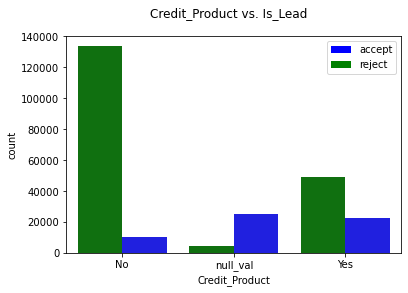

In [44]:
#Credit_Product
fig, ax = plt.subplots()
sns.countplot('Credit_Product', hue="Is_Lead", data=df2, 
                palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need
ax.set_xlabel("Credit_Product")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches)
fig.suptitle("Credit_Product vs. Is_Lead");

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


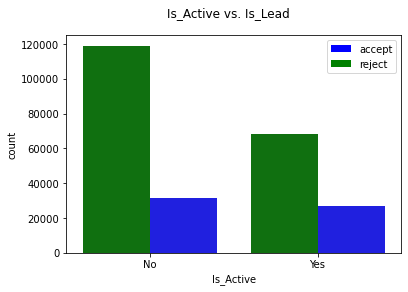

In [45]:
#Is_Active
fig, ax = plt.subplots()
sns.countplot('Is_Active', hue="Is_Lead", data=df2, 
                palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need
ax.set_xlabel("Is_Active")

color_patches = [
    Patch(facecolor="blue", label="accept"),
    Patch(facecolor="green", label="reject")
]
ax.legend(handles=color_patches)
fig.suptitle("Is_Active vs. Is_Lead");

In [46]:
## checking correlation of continuous variables
df2[cont_var].corr()
## since max corelation is 0.63 so continuous variables are not much correlated

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


## one hot encoding for categorical variables

In [47]:
## for training
catg_df=pd.get_dummies(df2[catg_var],prefix=catg_var)

## for test
catg_tdf=pd.get_dummies(tdf2[catg_var],prefix=catg_var)

In [48]:
## check shape and head of training data
print(catg_df.shape)
catg_df.head()

(245725, 50)


,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [49]:
## check shape and head of test data
print(catg_tdf.shape)
catg_tdf.head()

(105312, 50)


,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [50]:
## creating traing data frame after one hot encoding
df3=pd.concat([df2[cust_id], df2[target_var],df2[cont_var],catg_df], axis=1)

In [51]:
## creating test data frame after one hot encoding
tdf3=pd.concat([tdf2[cust_id],tdf2[cont_var],catg_tdf], axis=1)

In [52]:
print(df3.shape)
df3.head()

(245725, 55)


,ID,Is_Lead,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes
0,NNVBBKZB,0,73,43,1045696,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,IDD62UNG,0,30,32,581988,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,HD3DSEMC,0,56,26,1484315,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,BF3NC7KV,0,34,19,470454,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,TEASRWXV,0,30,33,886787,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## checking correlation

In [53]:
corr_df=pd.DataFrame(df3.drop(["ID","Is_Lead"],axis=1).corr())
print(corr_df.shape)
corr_df.head()

(53, 53)


,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes
Age,1.000000,0.631242,0.145232,-0.152076,0.152076,-0.040516,-0.001587,-0.073380,0.015840,-0.004748,...,0.152652,-0.664600,0.273153,0.456338,0.009252,-0.246636,0.129865,0.192168,-0.218770,0.218770
Vintage,0.631242,1.000000,0.167433,-0.146380,0.146380,-0.037195,-0.025112,-0.059256,0.004940,0.002861,...,0.221024,-0.571828,0.144931,0.538829,-0.162419,-0.235752,0.095078,0.224488,-0.209356,0.209356
Avg_Account_Balance,0.145232,0.167433,1.000000,-0.022477,0.022477,-0.046633,-0.071424,-0.077110,0.025159,0.114539,...,0.003467,-0.098179,0.010163,0.106906,-0.027096,-0.070495,0.046030,0.042413,-0.076637,0.076637
Gender_Female,-0.152076,-0.146380,-0.022477,1.000000,-1.000000,0.007592,-0.009920,0.012969,-0.011445,-0.019024,...,-0.085863,0.184372,-0.116018,-0.080782,-0.019916,0.077313,-0.042976,-0.057055,0.064207,-0.064207
Gender_Male,0.152076,0.146380,0.022477,-1.000000,1.000000,-0.007592,0.009920,-0.012969,0.011445,0.019024,...,0.085863,-0.184372,0.116018,0.080782,0.019916,-0.077313,0.042976,0.057055,-0.064207,0.064207


In [54]:
## cehcking corr for train
corr=df3.drop(["ID","Is_Lead"],axis=1).corr()
columns=np.full((corr.shape[0],),True, dtype=bool)
for i in range(len(corr)):
    for j in range(len(corr)):
        if corr.iloc[i,j]>0.5 and corr.iloc[i,j]<1.0:
            print(corr.index[i],corr.index[j],corr.iloc[i,j])
            
## max correlation is 0.63 so no need to remove any var

Age Vintage 0.6312424108308908
Vintage Age 0.6312424108308908
Vintage Channel_Code_X3 0.5388285624589456
Occupation_Salaried Channel_Code_X1 0.5907471364404442
Channel_Code_X1 Occupation_Salaried 0.5907471364404442
Channel_Code_X3 Vintage 0.5388285624589456


In [55]:
## checking corr for test
corr_test=tdf3.drop(["ID"],axis=1).corr()
columns=np.full((corr_test.shape[0],),True, dtype=bool)
for i in range(len(corr_test)):
    for j in range(len(corr_test)):
        if corr_test.iloc[i,j]>0.5 and corr_test.iloc[i,j]<1.0:
            print(corr_test.index[i],corr_test.index[j],corr_test.iloc[i,j])
            
## max correlation is 0.62 so no need to remove any var

Age Vintage 0.622310487023859
Vintage Age 0.622310487023859
Vintage Channel_Code_X3 0.5336146091611278
Occupation_Salaried Channel_Code_X1 0.5923352136986415
Channel_Code_X1 Occupation_Salaried 0.5923352136986415
Channel_Code_X3 Vintage 0.5336146091611278


## checking for outliers

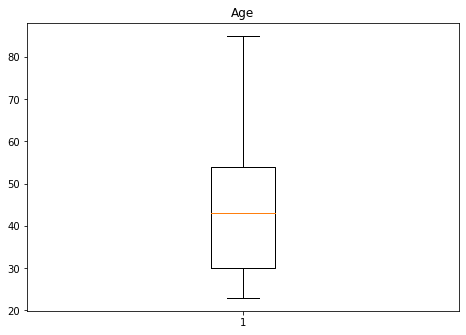

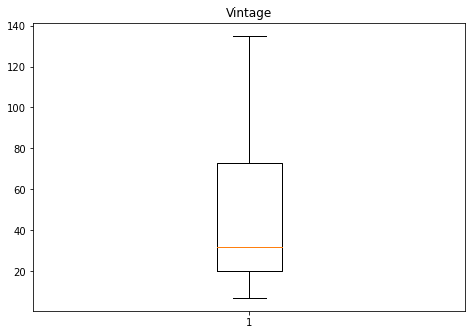

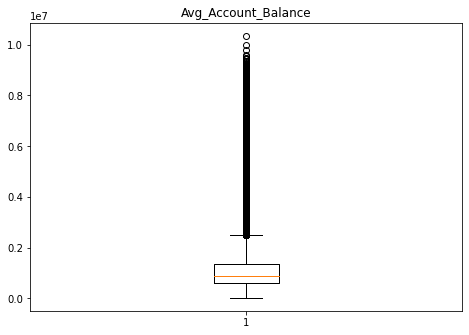

In [56]:
# plotting histogram for continuous var for taring data
for j in (cont_var):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    bp=ax.boxplot(df3[j])
    plt.title(j)
    plt.show()

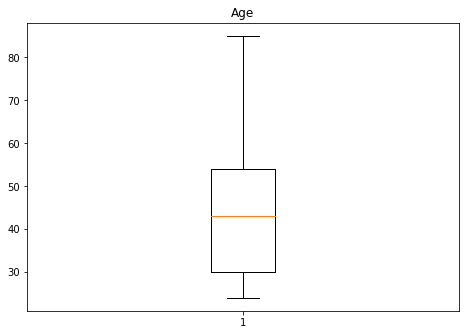

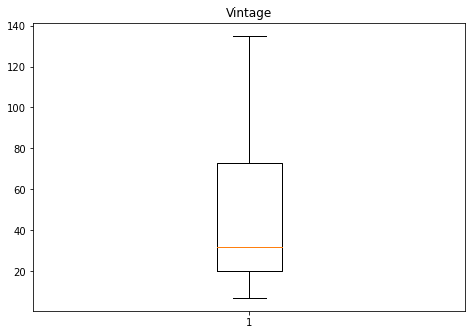

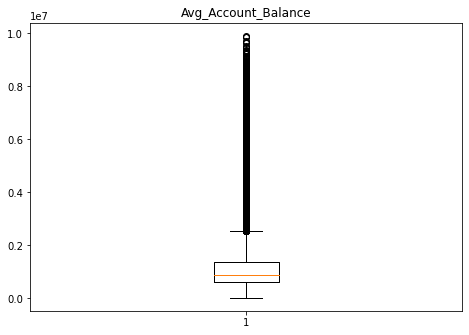

In [57]:
# plotting histogram for continuous var for test data
for j in (cont_var):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    bp=ax.boxplot(tdf3[j])
    plt.title(j)
    plt.show()

In [58]:
df3[cont_var].describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


In [59]:
## doing outlier treatment for training data
## flooring
for i in (cont_var):
    a=np.percentile(df3[i],25)-1.5*(np.percentile(df3[i],75)-np.percentile(df3[i],25))
    df3[i]=np.where(df3[i]<a,a,df3[i])
    
## capping
for i in (cont_var):
    b=np.percentile(df3[i],75)+1.5*(np.percentile(df3[i],75)-np.percentile(df3[i],25))
    df3[i]=np.where(df3[i]>b,b,df3[i])

In [60]:
## doing for test data

## flooring
for i in (cont_var):
    a=np.percentile(df3[i],25)-1.5*(np.percentile(df3[i],75)-np.percentile(df3[i],25))
    tdf3[i]=np.where(tdf3[i]<a,a,tdf3[i])
    
## capping
for i in (cont_var):
    b=np.percentile(df3[i],75)+1.5*(np.percentile(df3[i],75)-np.percentile(df3[i],25))
    tdf3[i]=np.where(tdf3[i]>b,b,tdf3[i])

In [61]:
## splitting the train data into dev(70%) and itv(30%) data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(df3.drop(target_var,axis=1),df3[target_var],test_size=0.3,random_state=10)


In [63]:
## Creating and Development data
dev=x_train.copy()
dev[target_var]=y_train
print(dev.shape)
print(dev[target_var].value_counts()/dev.shape[0])
dev.head()

(172007, 55)
Is_Lead
0          0.764451
1          0.235549
dtype: float64


,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes,Is_Lead
40774,NK2U7DGY,34.0,27.0,270150.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
158466,NBBAR6NX,54.0,45.0,2510200.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
82878,HXJCSIYE,61.0,50.0,1155994.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
117102,NKAGASKF,25.0,14.0,601844.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
28563,7UZBL4QL,49.0,56.0,594377.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [64]:
## Creating and in time validation data
itv=x_test.copy()
itv[target_var]=y_test
print(itv.shape)
print(itv[target_var].value_counts()/itv.shape[0])
itv.head()

(73718, 55)
Is_Lead
0          0.758919
1          0.241081
dtype: float64


,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes,Is_Lead
62674,ABZDBUYQ,59.0,91.0,522812.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
94222,LCCNBMFC,43.0,86.0,1516444.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
30588,CFN6TCIQ,27.0,27.0,1434315.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
123623,DUO6WXPQ,54.0,110.0,448390.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
237616,AUPKSWBZ,40.0,91.0,601898.0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [65]:
## creating out of time validation data
otv=tdf3.copy()
print(otv.shape)
otv.head()

(105312, 54)


,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_null_val,Is_Active_No,Is_Active_Yes
0,VBENBARO,29.0,25.0,742366.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,CCMEWNKY,43.0,49.0,925537.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,VK3KGA9M,31.0,14.0,215949.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,TT8RPZVC,29.0,33.0,868070.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,SHQZEYTZ,29.0,19.0,657087.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [66]:
## creating a list of variables based on types
# catg_var=["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]
# cont_var=["Age","Vintage","Avg_Account_Balance"]
cust_id=["ID"]
target_var=["Is_Lead"]
variable_grid=dev.drop(["ID","Is_Lead"],axis=1).columns
print(len(variable_grid))

53


## Building Logistic Regression Model

In [67]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [68]:
# fit the model with data
logreg.fit(dev[variable_grid],dev[target_var])

/Users/deepaksingla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [69]:
# Predicting for dev
y_pred=logreg.predict_proba(dev[variable_grid])

# Predicting for itv
y_itv=logreg.predict_proba(itv[variable_grid])

# Predicting for otv
y_otv=logreg.predict_proba(otv[variable_grid])

In [70]:
y_pred

array([[0.61891191, 0.38108809],
       [0.92373924, 0.07626076],
       [0.80279554, 0.19720446],
       ...,
       [0.84473241, 0.15526759],
       [0.8026693 , 0.1973307 ],
       [0.90690718, 0.09309282]])

In [71]:
## preparing the score file for dev data
dev_score=dev[cust_id+target_var]
dev_score["prob"]=y_pred[:, 1]
print(dev_score.shape)
print(dev_score.isnull().sum().sum())
dev_score.head()

(172007, 3)
0


<ipython-input-71-bd2928699db7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_score["prob"]=y_pred[:, 1]


,ID,Is_Lead,prob
40774,NK2U7DGY,0,0.381088
158466,NBBAR6NX,0,0.076261
82878,HXJCSIYE,0,0.197204
117102,NKAGASKF,0,0.303419
28563,7UZBL4QL,0,0.378752


In [72]:
## preparing the score file for itv data
itv_score=itv[cust_id+target_var]
itv_score["prob"]=y_itv[:, 1]
print(itv_score.shape)
print(itv_score.isnull().sum().sum())
itv_score.head()

(73718, 3)
0


<ipython-input-72-4b2b0983f01a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itv_score["prob"]=y_itv[:, 1]


,ID,Is_Lead,prob
62674,ABZDBUYQ,1,0.521589
94222,LCCNBMFC,0,0.381499
30588,CFN6TCIQ,0,0.212523
123623,DUO6WXPQ,0,0.664887
237616,AUPKSWBZ,0,0.617878


In [73]:
## preparing the score file for otv data
otv_score=otv[cust_id]
otv_score["prob"]=y_otv[:, 1]
print(otv_score.shape)
print(otv_score.isnull().sum().sum())
otv_score.head()

(105312, 2)
0


<ipython-input-73-107cee7ab5dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otv_score["prob"]=y_otv[:, 1]


,ID,prob
0,VBENBARO,0.308602
1,CCMEWNKY,0.314163
2,VK3KGA9M,0.343404
3,TT8RPZVC,0.322452
4,SHQZEYTZ,0.295766


In [74]:
## scoring the aucroc
print(roc_auc_score(dev_score["Is_Lead"], dev_score["prob"]))
print(roc_auc_score(itv_score["Is_Lead"], itv_score["prob"]))

0.5738545876317654
0.5722968085628436


## Building Random Forest Model

In [75]:
## defining random forest classifier
rf_clf = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=4,random_state=0)

In [76]:
# fit the model with data
rf_clf.fit(dev[variable_grid],dev[target_var])

<ipython-input-76-6ccbc39c81c6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(dev[variable_grid],dev[target_var])


RandomForestClassifier(max_depth=4, n_estimators=500, random_state=0)

In [77]:
# Predicting for dev
y_pred=rf_clf.predict_proba(dev[variable_grid])

# Predicting for itv
y_itv=rf_clf.predict_proba(itv[variable_grid])

# Predicting for otv
y_otv=rf_clf.predict_proba(otv[variable_grid])

In [78]:
## preparing the score file for dev data
dev_score=dev[cust_id+target_var]
dev_score["prob"]=y_pred[:, 1]
print(dev_score.shape)
print(dev_score.isnull().sum().sum())
dev_score.head()

(172007, 3)
0


<ipython-input-78-bd2928699db7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_score["prob"]=y_pred[:, 1]


,ID,Is_Lead,prob
40774,NK2U7DGY,0,0.071219
158466,NBBAR6NX,0,0.298140
82878,HXJCSIYE,0,0.109589
117102,NKAGASKF,0,0.070404
28563,7UZBL4QL,0,0.158932


In [79]:
## preparing the score file for itv data
itv_score=itv[cust_id+target_var]
itv_score["prob"]=y_itv[:, 1]
print(itv_score.shape)
print(itv_score.isnull().sum().sum())
itv_score.head()

(73718, 3)
0


<ipython-input-79-4b2b0983f01a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itv_score["prob"]=y_itv[:, 1]


,ID,Is_Lead,prob
62674,ABZDBUYQ,1,0.622123
94222,LCCNBMFC,0,0.213948
30588,CFN6TCIQ,0,0.067942
123623,DUO6WXPQ,0,0.374318
237616,AUPKSWBZ,0,0.218569


In [80]:
## preparing the score file for otv data
otv_score=otv[cust_id]
otv_score["prob"]=y_otv[:, 1]
print(otv_score.shape)
print(otv_score.isnull().sum().sum())
otv_score.head()

(105312, 2)
0


<ipython-input-80-107cee7ab5dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otv_score["prob"]=y_otv[:, 1]


,ID,prob
0,VBENBARO,0.155940
1,CCMEWNKY,0.587106
2,VK3KGA9M,0.069796
3,TT8RPZVC,0.071700
4,SHQZEYTZ,0.067082


In [81]:
## getting aucroc
print(roc_auc_score(dev_score["Is_Lead"], dev_score["prob"]))
print(roc_auc_score(itv_score["Is_Lead"], itv_score["prob"]))

0.8631764604693093
0.8626188134262358


In [82]:
## preparing the final otv scored file
otv_score=otv_score.reset_index()
otv_score2=otv_score.drop(["index"],axis=1)
otv_score2=otv_score2.rename({"prob":"Is_Lead"},axis=1)
print(otv_score2.shape)
otv_score2.head()

(105312, 2)


,ID,Is_Lead
0,VBENBARO,0.155940
1,CCMEWNKY,0.587106
2,VK3KGA9M,0.069796
3,TT8RPZVC,0.071700
4,SHQZEYTZ,0.067082


In [83]:
#otv_score2.to_csv("RF_otv_score_v1.csv",index=False)

## Building XGBoost Model

In [84]:
## creating dataset in dmatrix format for input into xgboost
dtrain_grid=xgb.DMatrix(df3[variable_grid],label=df3[target_var].values)
ddev_grid=xgb.DMatrix(dev[variable_grid],label=dev[target_var].values)
ditv_grid=xgb.DMatrix(itv[variable_grid],label=itv[target_var].values)
dotv_grid=xgb.DMatrix(otv[variable_grid])

In [85]:
## defining the ratio of non event to evnt
ratio=dev[target_var].value_counts()[0]/dev[target_var].value_counts()[1]
ratio

3.2454092210484746

In [86]:
## defining Parameter Grid
default_param_grid={
                    'gamma' : [0,1,10],
                    'learning_rate':[0.01,0.05,0.1],
                    'max_depth':[2,3,4],
                    'subsample':[0.6,0.8,1.0],
                    'colsample_by_tree':[0.6,0.8,1.0],
                    'num_boost_round' : [500],
                    'eval_metric' : ['aucpr','logloss'],
                    'scale_pos_weight': [1,np.sqrt(ratio)]
}

In [87]:
params_df=list(ParameterGrid(default_param_grid))
params_df=pd.DataFrame(params_df)
print(params_df.shape)

(972, 8)


In [88]:
## Defining Evaluation set
eval_set=[(ddev_grid,"Dev"),(ditv_grid,"validation")]

In [89]:
col_names=["gamma","learning_rate","max_depth","subsample","colsample_by_tree","best_num_trees","scale_pos_weight",'auc_dev',"auc_itv"]
grid_search=pd.DataFrame(columns=col_names)
grid_search

,gamma,learning_rate,max_depth,subsample,colsample_by_tree,best_num_trees,scale_pos_weight,auc_dev,auc_itv


In [90]:
# ## running the grid serach
# for i in range(len(params_df)):
#     print(i)
    
#     model_grid=xgb.train({
#         'learning_rate':params_df["learning_rate"].iloc[i],
#         'booster':'gbtree',
#         'objective':'binary:logistic',
#         'max_depth':params_df["max_depth"].iloc[i],
#         'gamma':params_df["gamma"].iloc[i],
#         'eval_metric':params_df["eval_metric"].iloc[i],
#         'scale_pos_weight':params_df["scale_pos_weight"].iloc[i],
#         'seed':1,
#         'verbose':False,
#         'subsample':params_df["subsample"].iloc[i],
#         'colsample_by_tree':params_df["colsample_by_tree"].iloc[i],
#         },dtrain=ddev_grid,num_boost_round=params_df["num_boost_round"].iloc[i],
#          early_stopping_rounds=50, evals=eval_set, verbose_eval=False)
    
#     prob_train=model_grid.predict(ddev_grid,ntree_limit=model_grid.best_ntree_limit)
#     auc_dev=roc_auc_score(dev[target_var].iloc[:,0], prob_train)
    
#     prob_itv=model_grid.predict(ditv_grid,ntree_limit=model_grid.best_ntree_limit)
#     auc_itv=roc_auc_score(itv[target_var].iloc[:,0], prob_itv)
    
#     grid_search.loc[len(grid_search)] = [params_df['gamma'].iloc[i],params_df['learning_rate'].iloc[i],
#                                         params_df['max_depth'].iloc[i],params_df['subsample'].iloc[i],
#                                         params_df['colsample_by_tree'].iloc[i],model_grid.best_ntree_limit,
#                                         params_df['scale_pos_weight'].iloc[i],auc_dev,auc_itv]
#     #pd.DataFrame(grid_search).to_csv("grid_search_output_v2.csv")

In [91]:
# ## checking the grid search output
# grid_search_output_v1=pd.read_csv("grid_search_output_v2.csv")
# print(grid_search_output_v1.shape)
# grid_search_output_v1

In [92]:
#otv_score2.to_csv("XGB_otv_score_v1.csv",index=False)

In [93]:
#otv_score2.to_csv("XGB_otv_score_v2.csv",index=False)

In [94]:
#otv_score2.to_csv("XGB_otv_score_v3.csv",index=False)
#otv_score2.to_csv("XGB_otv_score_v4.csv",index=False)

## running another grid search

In [95]:
## defining Parameter Grid
default_param_grid={
                    'gamma' : [0.1,1,5],
                    'learning_rate':[0.05],
                    'max_depth':[4,5,6],
                    'subsample':[0.8],
                    'num_boost_round' : [500],
                    'eval_metric' : ['aucpr','logloss'],
                    'scale_pos_weight': [1,np.sqrt(ratio)],
                    'seed':[5,10,49]
}

params_df=list(ParameterGrid(default_param_grid))
params_df=pd.DataFrame(params_df)
print(params_df.shape)

col_names=["gamma","learning_rate","max_depth","subsample","eval_metric","seed","best_num_trees","scale_pos_weight",'auc_dev',"auc_itv"]
grid_search=pd.DataFrame(columns=col_names)
grid_search

(108, 8)


,gamma,learning_rate,max_depth,subsample,eval_metric,seed,best_num_trees,scale_pos_weight,auc_dev,auc_itv


In [96]:
# for i in range(len(params_df)):
#     print(i)
    
#     model_grid=xgb.train({
#         'learning_rate':params_df["learning_rate"].iloc[i],
#         'booster':'gbtree',
#         'objective':'binary:logistic',
#         'max_depth':params_df["max_depth"].iloc[i],
#         'gamma':params_df["gamma"].iloc[i],
#         'eval_metric':params_df["eval_metric"].iloc[i],
#         'scale_pos_weight':params_df["scale_pos_weight"].iloc[i],
#         'seed':params_df["seed"].iloc[i],
#         'verbose':False,
#         'subsample':params_df["subsample"].iloc[i],
#         },dtrain=ddev_grid,num_boost_round=params_df["num_boost_round"].iloc[i],
#          early_stopping_rounds=50, evals=eval_set, verbose_eval=False)
    
#     prob_train=model_grid.predict(ddev_grid,ntree_limit=model_grid.best_ntree_limit)
#     auc_dev=roc_auc_score(dev[target_var].iloc[:,0], prob_train)
    
#     prob_itv=model_grid.predict(ditv_grid,ntree_limit=model_grid.best_ntree_limit)
#     auc_itv=roc_auc_score(itv[target_var].iloc[:,0], prob_itv)
    
#     grid_search.loc[len(grid_search)] = [params_df['gamma'].iloc[i],params_df['learning_rate'].iloc[i],
#                                         params_df['max_depth'].iloc[i],params_df['subsample'].iloc[i],
#                                         params_df['eval_metric'].iloc[i],params_df['seed'].iloc[i],
#                                         model_grid.best_ntree_limit,params_df['scale_pos_weight'].iloc[i],
#                                         auc_dev,auc_itv]
#     pd.DataFrame(grid_search).to_csv("grid_search_output_v3.csv")

In [97]:
#otv_score2.to_csv("XGB_otv_score_v5.csv",index=False)
#otv_score2.to_csv("XGB_otv_score_v6.csv",index=False)

In [98]:
#otv_score2.to_csv("XGB_otv_score_v7.csv",index=False)

In [99]:
## based on grid search following is the best hyperparameter value
## Training on 100% of training data
model_v6=xgb.train({'learning_rate':0.05,
                'booster':'gbtree',
                'objective':'binary:logistic',
                'max_depth': 7,
                'seed': 155,
                'colsample_by_tree':0.8,
                #'verbose': False,
                'subsample': 0.8,
#                 'scale_pos_weight':0.9,
                'gamma' : 0.01} , dtrain=dtrain_grid, num_boost_round=238)

[00:43:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:43:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
## doing prediction

## for 100% traing data
prob_train=model_v6.predict(dtrain_grid)

## for otv
prob_otv=model_v6.predict(dotv_grid)

In [101]:
## preparing the score file for dev data
train_score=df3[cust_id+target_var]
train_score["prob"]=prob_train
print(train_score.shape)
print(train_score.isnull().sum().sum())
train_score.head()

(245725, 3)
0


<ipython-input-101-280d415d6765>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_score["prob"]=prob_train


,ID,Is_Lead,prob
0,NNVBBKZB,0,0.042151
1,IDD62UNG,0,0.055829
2,HD3DSEMC,0,0.066950
3,BF3NC7KV,0,0.045926
4,TEASRWXV,0,0.045889


In [102]:
## preparing the score file for otv data
otv_score=otv[cust_id]
otv_score["prob"]=prob_otv
print(otv_score.shape)
print(otv_score.isnull().sum().sum())
otv_score.head()

(105312, 2)
0


<ipython-input-102-ea3e5cda2238>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otv_score["prob"]=prob_otv


,ID,prob
0,VBENBARO,0.028059
1,CCMEWNKY,0.878527
2,VK3KGA9M,0.079364
3,TT8RPZVC,0.023243
4,SHQZEYTZ,0.021169


In [103]:
## getting aucroc
print(roc_auc_score(train_score["Is_Lead"], train_score["prob"]))

0.8901051364018673


In [104]:
otv_score=otv_score.reset_index()
otv_score2=otv_score.drop(["index"],axis=1)
otv_score2=otv_score2.rename({"prob":"Is_Lead"},axis=1)
print(otv_score2.shape)
otv_score2.head()

(105312, 2)


,ID,Is_Lead
0,VBENBARO,0.028059
1,CCMEWNKY,0.878527
2,VK3KGA9M,0.079364
3,TT8RPZVC,0.023243
4,SHQZEYTZ,0.021169


In [105]:
otv_score2.to_csv("XGB_otv_score_final.csv",index=False)

## other performance metrices

In [107]:
fpr, tpr, threshold = metrics.roc_curve(train_score["Is_Lead"], train_score["prob"])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8901051364018673

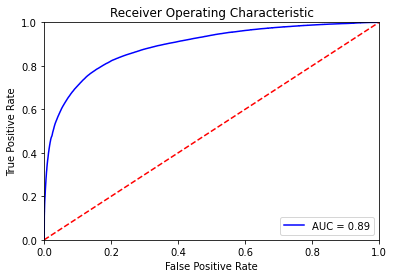

In [108]:
# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [109]:
def KS_table(Y,Y_HAT):
    import pandas as pd
    INPUT = pd.DataFrame({'Y': Y ,'Y_HAT':Y_HAT})
    INPUT['GROUP SCORE'] = pd.qcut(INPUT['Y_HAT'],10,duplicates = 'drop')
   
    KS_TABLE = INPUT.groupby('GROUP SCORE')['Y_HAT'].agg(['min','max','mean','count']).reset_index().sort_values('GROUP SCORE',ascending = False)
    KS_TABLE.columns = ['GROUP SCORE', 'MIN SCORE','MAX SCORE', 'mean_score', 'TOTAL COUNT']
    KS_TABLE['% TOTAL COUNT'] = (100*KS_TABLE['TOTAL COUNT']/sum(KS_TABLE['TOTAL COUNT'])).round(2)
   
    temp = INPUT.groupby('GROUP SCORE')['Y'].agg('sum').reset_index().sort_values('GROUP SCORE', ascending = False)
    temp.columns = ['GROUP SCORE','RESPONDERS']
   
    KS_TABLE = KS_TABLE.merge(temp, on = 'GROUP SCORE' , how = 'inner')
    KS_TABLE['NON RESPONDERS'] = KS_TABLE['TOTAL COUNT'] - KS_TABLE['RESPONDERS']
    KS_TABLE['RESPONSE RATE (%)'] = (100*KS_TABLE['RESPONDERS']/KS_TABLE['TOTAL COUNT']).round(2)
   
    KS_TABLE['CUM TOTAL COUNT'] = KS_TABLE['TOTAL COUNT'].cumsum()
    KS_TABLE['CUM RESPONDERS'] = KS_TABLE['RESPONDERS'].cumsum()
    KS_TABLE['CUM NON RESPONDERS'] = KS_TABLE['NON RESPONDERS'].cumsum()
   
    KS_TABLE['CUM % TOTAL COUNT'] = (100*KS_TABLE['CUM TOTAL COUNT']/sum(KS_TABLE['TOTAL COUNT'])).round(2)
    KS_TABLE['CUM % RESPONDERS'] = (100*KS_TABLE['CUM RESPONDERS']/sum(KS_TABLE['RESPONDERS'])).round(2)
    KS_TABLE['CUM % NON RESPONDERS'] = (100*KS_TABLE['CUM NON RESPONDERS']/sum(KS_TABLE['NON RESPONDERS'])).round(2)
                                       
    KS_TABLE['KS'] = KS_TABLE['CUM % RESPONDERS'] - KS_TABLE['CUM % NON RESPONDERS']
    KS_TABLE['LIFT'] = (1.0*KS_TABLE['CUM % RESPONDERS']/KS_TABLE['CUM % TOTAL COUNT']).round(2)
    KS_TABLE['abs_perc'] = abs(KS_TABLE['mean_score'] - KS_TABLE['RESPONSE RATE (%)']/100)*100
                                       
    ks =  round(max(KS_TABLE['KS']),2)
    decile = np.argmax(KS_TABLE['CUM % RESPONDERS'] - KS_TABLE['CUM % NON RESPONDERS']) + 1
    print('KS =' + str(ks) + " at decile = " + str(decile))
                                       
    diff  = (KS_TABLE['RESPONSE RATE (%)'] - KS_TABLE['RESPONSE RATE (%)'].shift(-1))[:-1]
    breaks = [str(i+1) for i , value in enumerate(diff) if value<0]
    if len(breaks) == 0:
        print(' There are no rank order breaks')
    else:
        print('There are rank order break(s) at decile(s)' + ','.join(breaks))
                                       
    return KS_TABLE

In [110]:
KS_table(train_score["Is_Lead"], train_score["prob"])

KS =62.74 at decile = 3
 There are no rank order breaks


,GROUP SCORE,MIN SCORE,MAX SCORE,mean_score,TOTAL COUNT,% TOTAL COUNT,RESPONDERS,NON RESPONDERS,RESPONSE RATE (%),CUM TOTAL COUNT,CUM RESPONDERS,CUM NON RESPONDERS,CUM % TOTAL COUNT,CUM % RESPONDERS,CUM % NON RESPONDERS,KS,LIFT,abs_perc
0,"(0.826, 0.999]",0.825961,0.998716,0.881684,24573,10.0,22370,2203,91.03,24573,22370,2203,10.0,38.38,1.18,37.20,3.84,2.861647
1,"(0.433, 0.826]",0.432945,0.825960,0.595640,24572,10.0,14715,9857,59.89,49145,37085,12060,20.0,63.62,6.43,57.19,3.18,0.326018
2,"(0.253, 0.433]",0.252837,0.432945,0.335713,24573,10.0,8296,16277,33.76,73718,45381,28337,30.0,77.86,15.12,62.74,2.60,0.188652
3,"(0.145, 0.253]",0.145430,0.252821,0.191783,24572,10.0,4550,20022,18.52,98290,49931,48359,40.0,85.66,25.80,59.86,2.14,0.658300
4,"(0.087, 0.145]",0.086990,0.145420,0.112471,24572,10.0,2761,21811,11.24,122862,52692,70170,50.0,90.40,37.44,52.96,1.81,0.007064
5,"(0.0614, 0.087]",0.061361,0.086989,0.071361,24573,10.0,2057,22516,8.37,147435,54749,92686,60.0,93.93,49.45,44.48,1.57,1.233900
6,"(0.0543, 0.0614]",0.054294,0.061361,0.057289,24572,10.0,1548,23024,6.30,172007,56297,115710,70.0,96.58,61.73,34.85,1.38,0.571110
7,"(0.0493, 0.0543]",0.049316,0.054294,0.051884,24573,10.0,952,23621,3.87,196580,57249,139331,80.0,98.22,74.33,23.89,1.23,1.318429
8,"(0.0399, 0.0493]",0.039937,0.049316,0.045367,24572,10.0,632,23940,2.57,221152,57881,163271,90.0,99.30,87.11,12.19,1.10,1.966714
9,"(0.00627, 0.0399]",0.007269,0.039936,0.027125,24573,10.0,407,24166,1.66,245725,58288,187437,100.0,100.00,100.00,0.00,1.00,1.052518


In [111]:
#######................................Thanks..................................#######